# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

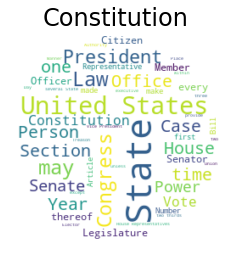

In [2]:
text = open(os.path.join(os.getcwd(), 'data/constitution.txt')).read()
wordcloud = text_to_wordcloud(text, title='Constitution')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [5]:
obs, obs_map = parse_observations(text)
print(obs_map)

{'we': 0, 'the': 1, 'people': 2, 'of': 3, 'united': 4, 'states': 5, 'in': 6, 'order': 7, 'to': 8, 'form': 9, 'a': 10, 'more': 11, 'perfect': 12, 'union': 13, 'establish': 14, 'justice': 15, 'insure': 16, 'domestic': 17, 'tranquility': 18, 'provide': 19, 'for': 20, 'common': 21, 'defence': 22, 'promote': 23, 'general': 24, 'welfare': 25, 'and': 26, 'secure': 27, 'blessings': 28, 'liberty': 29, 'ourselves': 30, 'our': 31, 'posterity': 32, 'do': 33, 'ordain': 34, 'this': 35, 'constitution': 36, 'america': 37, 'article': 38, 'i': 39, 'section': 40, '1': 41, 'all': 42, 'legislative': 43, 'powers': 44, 'herein': 45, 'granted': 46, 'shall': 47, 'be': 48, 'vested': 49, 'congress': 50, 'which': 51, 'consist': 52, 'senate': 53, 'house': 54, 'representatives': 55, '2': 56, 'composed': 57, 'members': 58, 'chosen': 59, 'every': 60, 'second': 61, 'year': 62, 'by': 63, 'several': 64, 'electors': 65, 'each': 66, 'state': 67, 'have': 68, 'qualifications': 69, 'requisite': 70, 'most': 71, 'numerous': 72

In [3]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

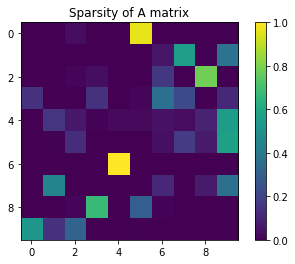

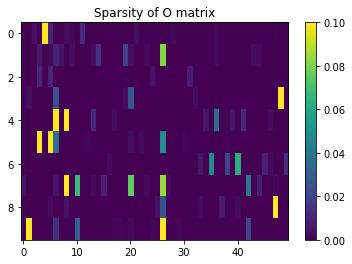

In [4]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [5]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
Their 1 other shall but their in with do thereof before a fix another president shall classes an two shall meet and the but it...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [6]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))


Sample Sentence:
States so page states shall both be states the before the shall of with the nevertheless year enemies georgia keep virginia judges such labour rules...


In [7]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))


Sample Sentence:
Alliance in no prescribed vice judicial collect of be been shall page president 2 states objections united consist inhabitant representatives representatives shall the office treasury...


In [8]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))


Sample Sentence:
Any all no title prince supreme attained lines any coin census be bound officer be be under not two to shall by offences the united...


In [9]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))


Sample Sentence:
Be respect another vi shall without any invasions we or which shall before appointed for but subscribed any person of alter shall be in one...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

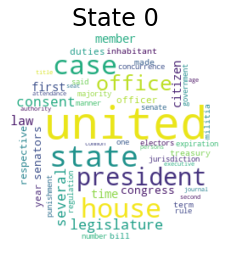

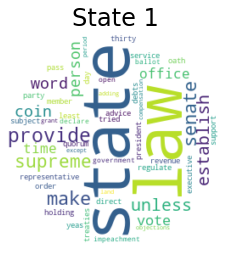

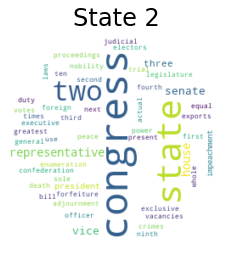

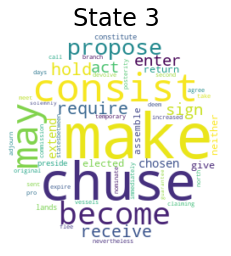

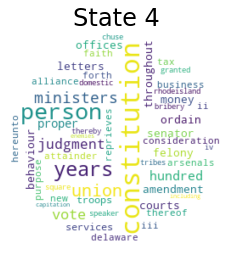

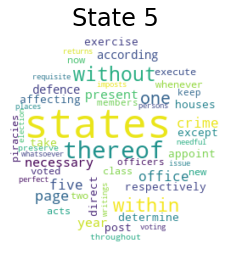

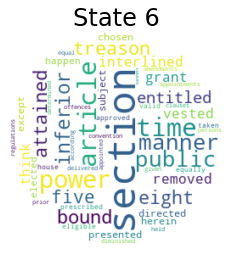

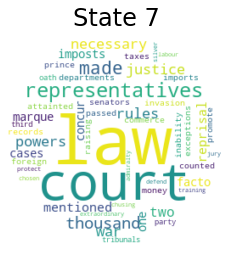

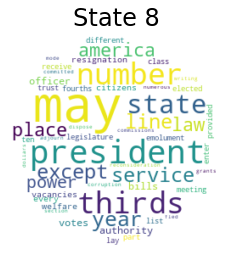

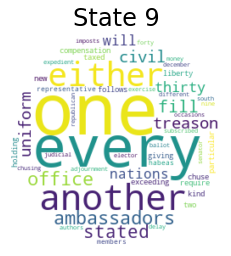

In [7]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.


Animating...


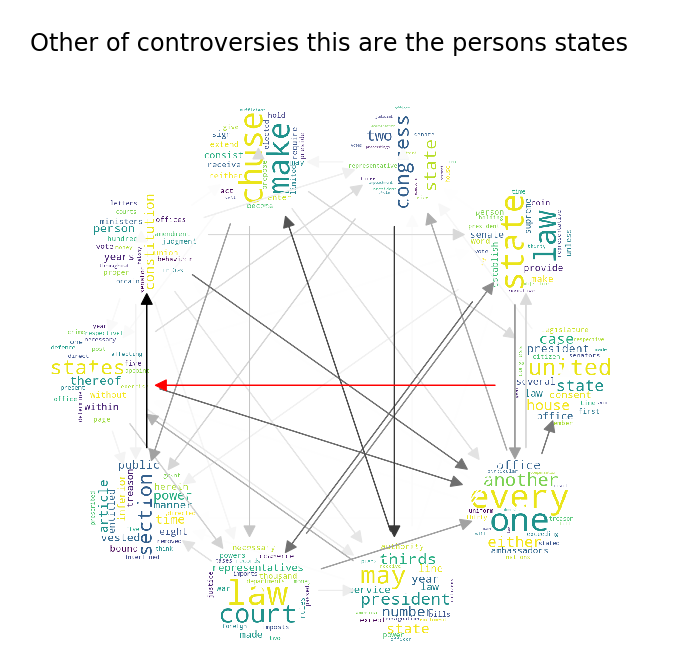

In [4]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())